# ipython与魔法命令

python语言的动态特性让它十分适合做科学计算,但原生的shell实在不给力,于是ipython应运而生,简单说ipython就是一个交互环境,但它确实的提高了码代码的效率,尤其与从他分离出去的`jupyter notebook`配合,可以实现程序,文档,演示的混合编辑.附带的宏命令机制`魔法命令`也是很好的补充,可以简单的实现一些单纯python要很麻烦才能实现的功能,与它的子项目`ipyparallel`配合更是可以简单实现多核并行运算,算是对cpython线程锁的一个弥补,它还支持内嵌Cython等扩展,非常强大.

本文主要讲它的使用和设置方法,以及魔法命令

## 默认的魔法命令

魔法命令都以%或者%%开头,可以理解为ipython里定义的宏或者内置方法,以%开头的成为行命令，%%开头的称为单元命令。行命令只对命令所在的行有效，而单元命令则必须出现在单元的第一行，对整个单元的代码进行处理。

执行`%lsmagic`可以查看关于各个命令的说明，而在命令之后添加`?`可以查看该命令的详细说明。


In [1]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python  %%python

### 用`!`调用系统命令

ipython可以很方便的调用系统命令,只要用`!`就行

In [2]:
!ls

count_file0.txt
count_file1.txt
count_file2.txt
count_file3.txt
count_file4.txt
count_file5.txt
count_file6.txt
count_file7.txt
count_file8.txt
count_file9.txt
ipython_with_magic_command.ipynb
ipython_with_magic_command_files
myfib.py
myfib.pyc
notebook格式转换工具.ipynb
source
src
在Ipython_Notebook中的代码调试与优化.ipynb
基于web的可交互运行环境jupyter.ipynb
多进程并行计算.ipynb


### 有用的命令

> %pwd

%pwd命令可以获取当前目录的信息


In [3]:
%pwd

'/Users/huangsizhe/WORKSPACE/Blog/Docs/Python/TutorialForJupyter/ipynbs'

> %cd

%cd 可以跳转到目标目录,`tab`键可以补完

> 画图设置`%matplotlib inline`

事实上这个命令是`%matplotlib`, inline是它的参数,这条命令的作用是指定`%matplotlib`输出图像的环境,最常用的就是inline,让它内嵌在notebook中显示,同时也可以有别的,比如 `%matplotlib osx`(注意看平台,像osx明显是mac专属,gtk需要windows下gtk环境,wx也需要wx环境),qt,tk,inline,notebook应该是可以放心使用的),一般inline足够好了


In [4]:
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'wx', 'qt', 'qt4', 'qt5', 'osx', 'nbagg', 'notebook', 'agg', 'inline', 'ipympl']


In [5]:
%matplotlib inline

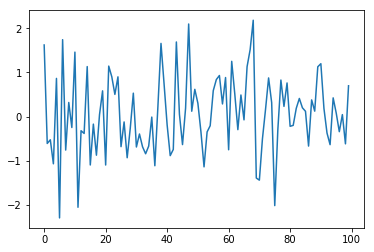

In [6]:
import pylab as pl
pl.seed(1)
data = pl.randn(100)
pl.plot(data);

可以配合 `%config InlineBackend.figure_format="svg"`做图片输出格式的设置

In [7]:
%config InlineBackend.figure_format="svg"
%matplotlib inline

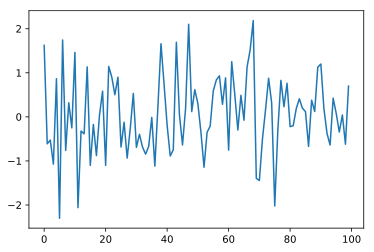

In [8]:
pl.plot(data);

> 将cell的输出保存到对象`%%capture result`

输出的内容会被以string的形式保存在`stdout`属性上

show()方法可以看到实际输出的内容

In [11]:
%%capture result

print([1,2,3])

In [12]:
result.stdout

'[1, 2, 3]\n'

In [13]:
result.show()

[1, 2, 3]


> 写入文件 %%writefile

In [16]:
%%writefile hello.py

#coding:utf-8
print("hello")

Overwriting hello.py


> 载入已有文件%load


In [19]:
# %load hello.py

print("hello")

hello


> 执行已有文件%run



In [20]:
%run hello.py

hello


## `*`自定义魔法命令

ipython是允许自定义魔法命令的,而且也不复杂,我们看个例子,

In [21]:
from __future__ import print_function
from IPython.core.magic import (Magics, magics_class, line_magic,
                                cell_magic, line_cell_magic)

# The class MUST call this class decorator at creation time
@magics_class
class MyMagics(Magics):

    @line_magic
    def lmagic(self, line):
        "my line magic"
        print(line)
        return line

    @cell_magic
    def cmagic(self, line, cell):
        "my cell magic"
        print(cell[:10])
        return line, cell

    @line_cell_magic
    def lcmagic(self, line, cell=None):
        "Magic that works both as %lcmagic and as %%lcmagic"
        if cell is None:
            print("Called as line magic")
            return line
        else:
            print("Called as cell magic")
            return line, cell


# In order to actually use these magics, you must register them with a
# running IPython.  This code must be placed in a file that is loaded once
# IPython is up and running:
ip = get_ipython()
# You can register the class itself without instantiating it.  IPython will
# call the default constructor on it.
ip.register_magics(MyMagics)


In [22]:
%lmagic 123

123


'123'

In [23]:
%%cmagic

1234
1234
1234
1234


1234
1234


('', '\n1234\n1234\n1234\n1234')

In [24]:
%%lcmagic 124

1234

Called as cell magic


('124', '\n1234')

我们可以把自己的魔法命令放在profile_default的startup文件夹下

### 一个组实用的自定义魔法命令


下面是个比较实用的自定义魔法命令,它的主要作用是利用子进程调用其他python解释器执行python脚本.

In [1]:
%%writefile src/startup.py

#coding:utf-8
from __future__ import print_function
from IPython.core.magic import (Magics, magics_class, line_magic,
                                cell_magic, line_cell_magic)
from IPython.core.interactiveshell import InteractiveShell
from IPython.lib.pretty import pretty as _pretty
sh = InteractiveShell.instance()

def pretty(obj):
    import numpy as np
    if isinstance(obj, np.ndarray):
        return np.array2string(obj, separator=", ")
    else:
        return _pretty(obj)

# The class MUST call this class decorator at creation time
@magics_class
class MyMagics(Magics):

    @line_magic
    def goodlook_list(self, line):
        """
            %col number_of_column code
            """
        pos = line.find(" ")
        n = int(line[:pos])
        code = line[pos+1:]
        result = pretty(sh.ev(code)).split("\n")
        max_width = max(len(line) for line in result) + 3
        result = [line.ljust(max_width) for line in result]
        result = "\n".join(["".join(result[i:i+n]) for i in xrange(0, len(result), n)])
        print(result)
        
    @line_magic
    def exec_py2(self, line):
        """
        pass all the arguments to a new python2 process
        """
        import subprocess
        cmd = "python " + line
        subprocess.Popen(cmd, shell=True)

    @line_magic
    def exec_py3(self, line):
        """
        pass all the arguments to a new python3 process
        """
        import subprocess
        cmd = "python3 " + line
        subprocess.Popen(cmd, shell=True)
    @line_magic
    def exec_pypy(self, line):
        """
        pass all the arguments to a new pypy process
        """
        import subprocess
        cmd = "pypy " + line
        subprocess.Popen(cmd, shell=True)
        
ip = get_ipython()
# You can register the class itself without instantiating it.  IPython will
# call the default constructor on it.
ip.register_magics(MyMagics)
    

Writing startup.py
